In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba

from rbatools.rba_session import SessionRBA

from matplotlib.gridspec import GridSpec
import seaborn


In [2]:
sampling_results=pandas.read_csv("../../RBAtools_FigSamples_stdevlog_0.1.csv",index_col=0)

In [4]:
glucose_color="#2E4DA7"
oxygen_color="#DC5964"
#acetate_color="#6DA7A4"
#acetate_color="#158582"
acetate_color="#E6B327"
growth_rate_color="#AAAABC"
contrast_line_color="#454555"
dark_mud="#E6B327"

In [5]:
title_font_size=18
ticklabel_fontsize=13
axislabel_fontsize=16
labelpad_axislables=0.5

In [65]:
def plot_kapp_sampling_mu(ax,input_data,mu_WT):
    seaborn.histplot(data=input_data.loc[(input_data["Mu"]!=4)&(input_data["Mu"]!=None)], 
                     x="Mu",
                     ax=ax,
                     alpha=0.3,
                     linewidth=0,
                     color=contrast_line_color, 
                     kde=True,
                     line_kws={"linewidth":4,"alpha":1,"color":"blue"},
                     bins=17,
                     fill=True, zorder=1)
    if mu_WT is not None:
        ax.axvline(mu_WT,color=contrast_line_color,linestyle="dashed",linewidth=2, zorder=2)
    ax.set_yticks([])
    ax.set_xticks([0.25,0.3,0.35,0.4])
    ax.set_xticklabels([0.25,0.3,0.35,0.4],fontsize=ticklabel_fontsize)
    ax.set_ylabel("")
    ax.set_xlabel("Growth-rate [$h^{-1}$]",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax.set_title("Sampled growth-rates",fontsize=title_font_size)


def plot_kapp_sampling_o2(ax,input_data,o2_WT):
    seaborn.histplot(data=input_data.loc[(input_data["R_EX_o2_e"]!=None)], 
                     x="R_EX_o2_e",
                     ax=ax,
                     alpha=0.4,
                     linewidth=0,
                     color=oxygen_color, 
                     kde=True,
                     line_kws={"linewidth":4,"alpha":1,"color":oxygen_color},
                     bins=17,
                     fill=True, zorder=1)
    if o2_WT is not None:
        ax.axvline(o2_WT,color=contrast_line_color,linestyle="dashed",linewidth=2, zorder=2)
    ax.set_yticks([])
    ax.set_xticks([8,9,10,11,12,13,14,15])
    ax.set_xticklabels([8,9,10,11,12,13,14,15],fontsize=ticklabel_fontsize)
    #ax[1].set_xlim(4.2,18.99)
    ax.set_ylabel("")
    ax.set_xlabel("$O_2$ uptake: [mmol (h $g_{DW}$)$^{-1}$]",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax.set_title("Sampled oxygen uptakes",fontsize=title_font_size)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # Remove the CWD from sys.path while we load stuff.


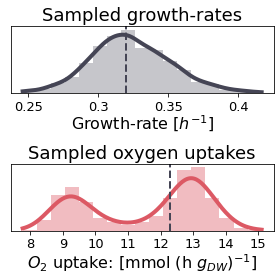

In [67]:
mu_WT=0.31982421875
o2_WT=12.301434020398014

fig = plt.figure(figsize=(4,4),constrained_layout=True)
gs = GridSpec(2,1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
plot_kapp_sampling_mu(ax=ax1,input_data=sampling_results,mu_WT=mu_WT)
plot_kapp_sampling_o2(ax=ax2,input_data=sampling_results,o2_WT=o2_WT)
plt.tight_layout()
plt.savefig('Global_sampling_review.png')